## Setting up

### Activate the auto-reload

In [1]:
%load_ext autoreload
%autoreload 2

### Import the libraries

In [2]:
import sys
from pathlib import Path
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

### Set file path to parent directory

In [3]:
sys.path.append(str(Path().resolve().parent / "src"))
os.chdir("../")

### Import the homemade functions

In [4]:
from src.data.data_import import DataImporter

### Get the API keys to access UN data

In [5]:
UN_API_KEY = "API key"

## Import the data

In [6]:
importer = DataImporter(api_key="1b9e65d70d9f4e1c8323548618cf877f")
df = importer.get_merged_data()
df.head(20)
df.tail(20)

100%|██████████| 4/4 [00:16<00:00,  4.22s/it]
/Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/src/data/data_import.py:92: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(list_df)


Saving the dataset to: /Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/data/external/trade_raw.csv
Saving the dataset to: /Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/data/interim/trade_clean.csv
Fetching ILO data from: https://rplumber.ilo.org/data/indicator/?id=EMP_TEMP_ECO_OCU_NB_A&timefrom=2000&timeto=2024&classif1=ECO_SECTOR_IND&classif2=OCU_SKILL_TOTAL&format=.csv
Saving the dataset to: /Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/data/external/employment_raw.csv
Saving the dataset to: /Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/data/interim/employment_clean.csv
Saving the dataset to: /Users/wanonnoiqtyider/Documents/GitHub/graspp-25S-trade/data/interim/merge.csv


Export        Import       ILO
country year                                      
ZAF     2019  8.939599e+10  8.803749e+10  3695.811
        2020  8.522677e+10  6.894316e+10  3232.947
        2021  1.213213e+11  9.343956e+10  3071.708
        2022  1.216163e+11  1.118803e+11  3319.454
        2023  1.106075e+11  1.071227e+11  3443.831
        2024  1.101094e+11  1.012402e+11  3563.356
ZMB     2015  6.565143e+09  7.932462e+09   495.890
        2017  8.028213e+09  8.002113e+09   466.120
        2018  9.022458e+09  9.494920e+09   523.788
        2019  7.039405e+09  7.173222e+09   496.325
        2020  7.923922e+09  5.285973e+09   491.284
        2021  1.101314e+10  6.981411e+09   582.673
        2022  1.164277e+10  9.003919e+09   564.790
        2023  1.043118e+10  1.012549e+10   670.902
ZWE     2011  3.121209e+09  7.984010e+09   493.862
        2014  3.871574e+09  6.069848e+09   460.792
        2019  4.279384e+09  4.787447e+09   552.490
        2021  6.036188e+09  7.541366e+09   715.323
        2022  6.586208e+09  8.603710e+09   662.185
        2023  7.225586e+09  9.201594e+09   627.991

## 3. Descriptive statistics min, max, mean of your variables

## 4. Scatter plots to compare the main relations of interest

### 4.1. All Countries

### 4.2. The United States

### 4.3. India

### 4.4. The United States vs. India 

## 5. Additional plots (time series analysis)

### 5.1. The United States

In [7]:
# Extract data for the United States (USA) 
usa_df = df.loc['USA']

# Display the first/last few rows of the USA data to examine the data 
print(usa_df.head())
print(usa_df.tail())
usa_df = df.loc['USA']

            Export        Import        ILO
year                                       
2003  7.247366e+11  1.302834e+12  30560.423
2004  8.148444e+11  1.525304e+12  30825.738
2005  9.010414e+11  1.734849e+12  31195.043
2006  1.037029e+12  1.918997e+12  31921.004
2007  1.162538e+12  2.017121e+12  31963.932
            Export        Import        ILO
year                                       
2020  1.430254e+12  2.405382e+12  28699.402
2021  1.753137e+12  2.932976e+12  29270.564
2022  2.062090e+12  3.372902e+12  30513.430
2023  2.018543e+12  3.168471e+12  31137.472
2024  2.063803e+12  3.356813e+12  30726.170


In [8]:
# Create a copy of the USA data to avoid modifying the original
usa_df = df.loc['USA'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
usa_df = usa_df.reset_index()

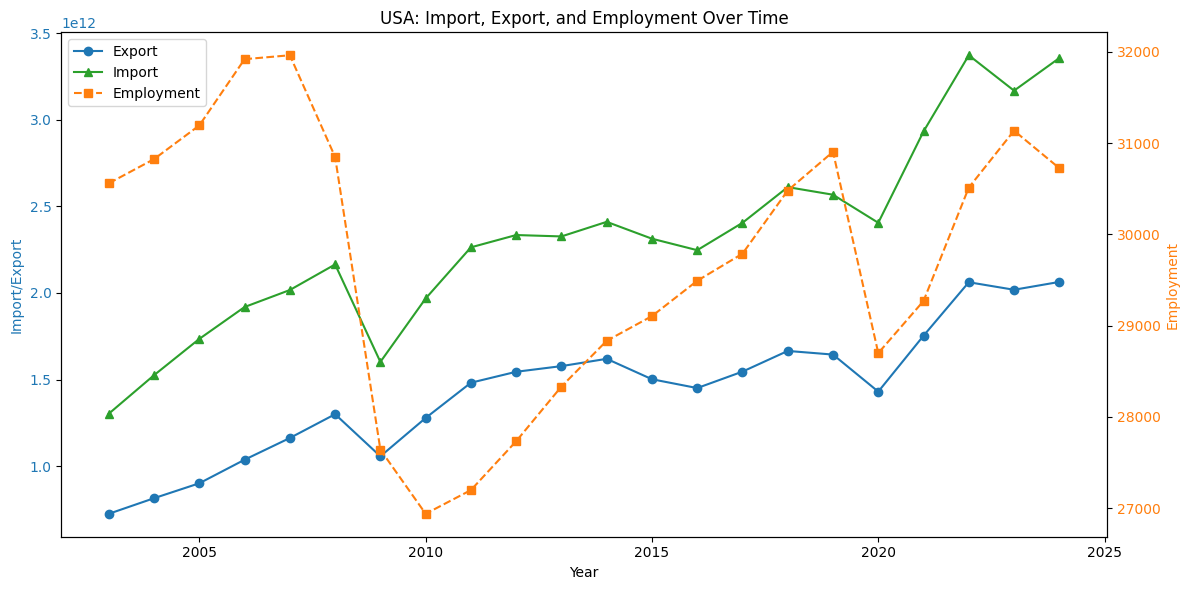

In [9]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(usa_df['year'], usa_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(usa_df['year'], usa_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(usa_df['year'], usa_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('USA: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.2. Japan

In [10]:
# Extract data for the Japan (JPN) 
jpn_df = df.loc['JPN']

# Display the first few rows of the JPN data to examine the data 
print(jpn_df.head())
print(jpn_df.tail())
jpn_df = df.loc['JPN']

            Export        Import        ILO
year                                       
2000  4.792755e+11  3.797084e+11  19925.225
2001  4.033441e+11  3.492919e+11  19362.772
2002  4.167294e+11  3.376131e+11  18581.652
2003  4.720069e+11  3.834653e+11  18558.721
2004  5.657611e+11  4.552539e+11  18039.636
            Export        Import        ILO
year                                       
2018  7.381951e+11  7.485253e+11  15742.423
2019  7.056711e+11  7.210774e+11  15762.287
2020  6.412826e+11  6.354023e+11  15503.838
2021  7.570663e+11  7.722762e+11  15346.013
2022  7.466721e+11  8.985999e+11  15409.052


In [11]:
# Create a copy of the JPN data to avoid modifying the original
jpn_df = df.loc['JPN'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
jpn_df = jpn_df.reset_index()

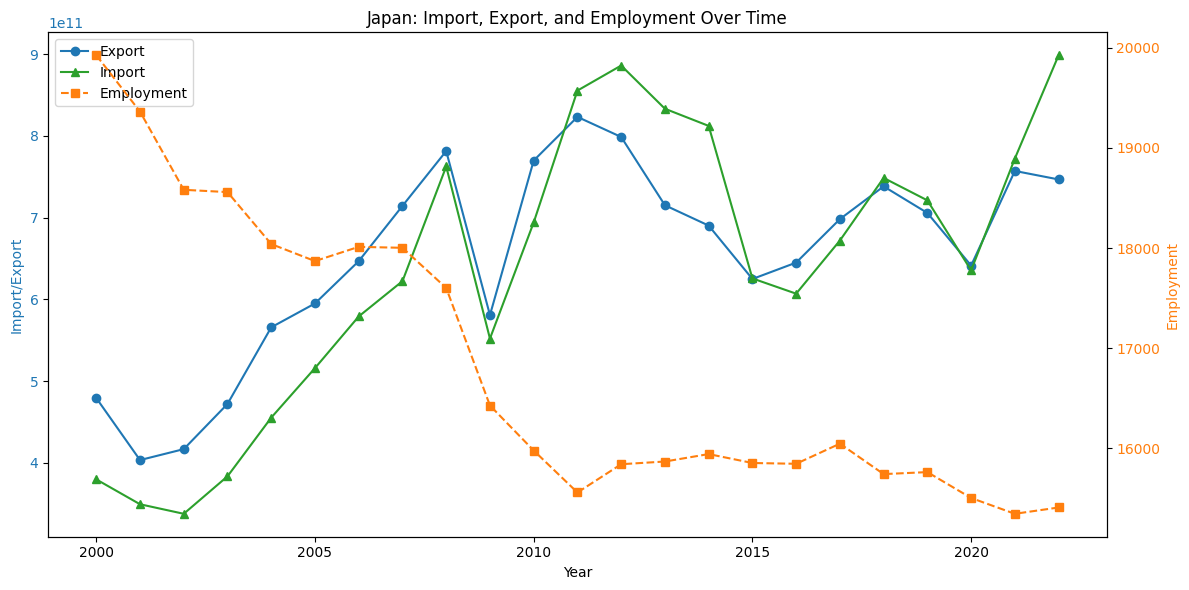

In [12]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(jpn_df['year'], jpn_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(jpn_df['year'], jpn_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(jpn_df['year'], jpn_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Japan: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.3. Germany

In [13]:
# Extract data for the Germany (DEU) 
deu_df = df.loc['DEU']

# Display the first few rows of the USA data to examine the data 
print(deu_df.head())
print(deu_df.tail())
deu_df = df.loc['DEU']

            Export        Import        ILO
year                                       
2000  5.496067e+11  5.008300e+11  12179.631
2001  5.714267e+11  4.860221e+11  11973.955
2002  6.159974e+11  4.904501e+11  11740.755
2003  7.485313e+11  6.017610e+11  11272.780
2004  9.117421e+11  7.181500e+11  11083.029
            Export        Import        ILO
year                                       
2019  1.493267e+12  1.239895e+12  11509.243
2020  1.385852e+12  1.173167e+12  11267.732
2021  1.635600e+12  1.424675e+12  11321.097
2022  1.686142e+12  1.588853e+12  11318.740
2023  1.697350e+12  1.469329e+12  11367.120


In [14]:
# Create a copy of the JPN data to avoid modifying the original
deu_df = df.loc['DEU'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
deu_df = deu_df.reset_index()

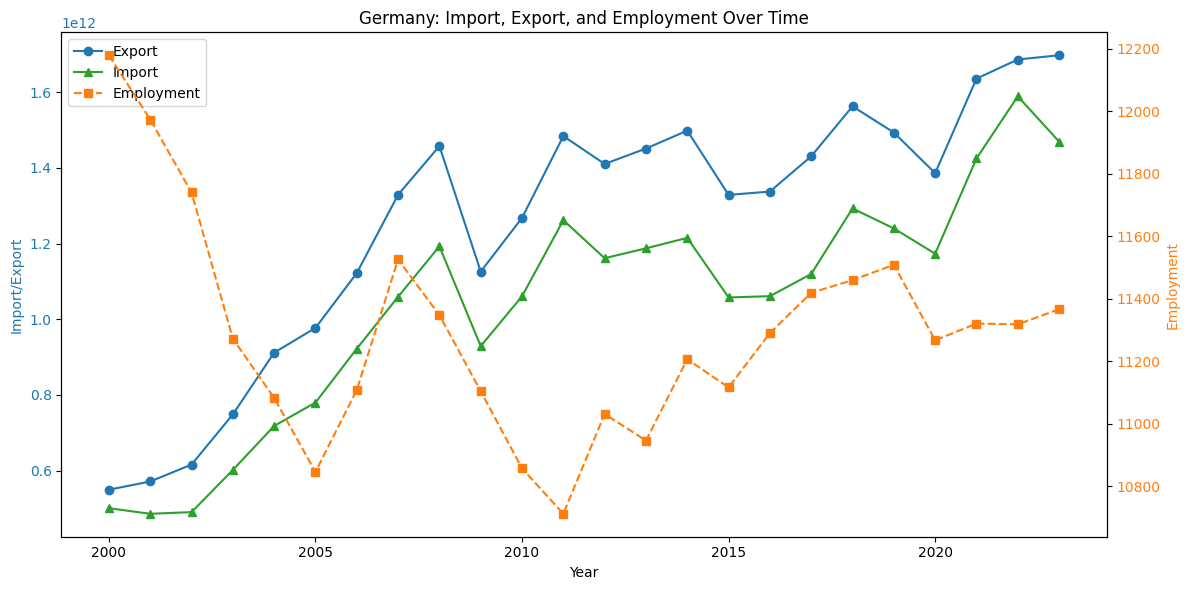

In [15]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(deu_df['year'], deu_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(deu_df['year'], deu_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(deu_df['year'], deu_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Germany: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.4. India

In [16]:
# Extract data for the India (IND) 
ind_df = df.loc['IND']

# Display the first few rows of the USA data to examine the data 
print(ind_df.head())
print(ind_df.tail())
ind_df = df.loc['IND']

            Export        Import        ILO
year                                       
2010  2.204085e+11  3.500294e+11  83757.228
2018  3.224921e+11  5.076157e+11  88115.752
2019  3.232507e+11  4.788837e+11  95942.189
2020  2.754887e+11  3.679804e+11  91691.611
2021  3.948137e+11  5.704020e+11  99435.749
            Export        Import         ILO
year                                        
2020  2.754887e+11  3.679804e+11   91691.611
2021  3.948137e+11  5.704020e+11   99435.749
2022  4.526842e+11  7.325660e+11  116195.210
2023  4.314120e+11  6.721401e+11  118109.251
2024  4.344355e+11  6.977451e+11  122489.102


In [17]:
# Create a copy of the IND data to avoid modifying the original
ind_df = df.loc['IND'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
ind_df = ind_df.reset_index()

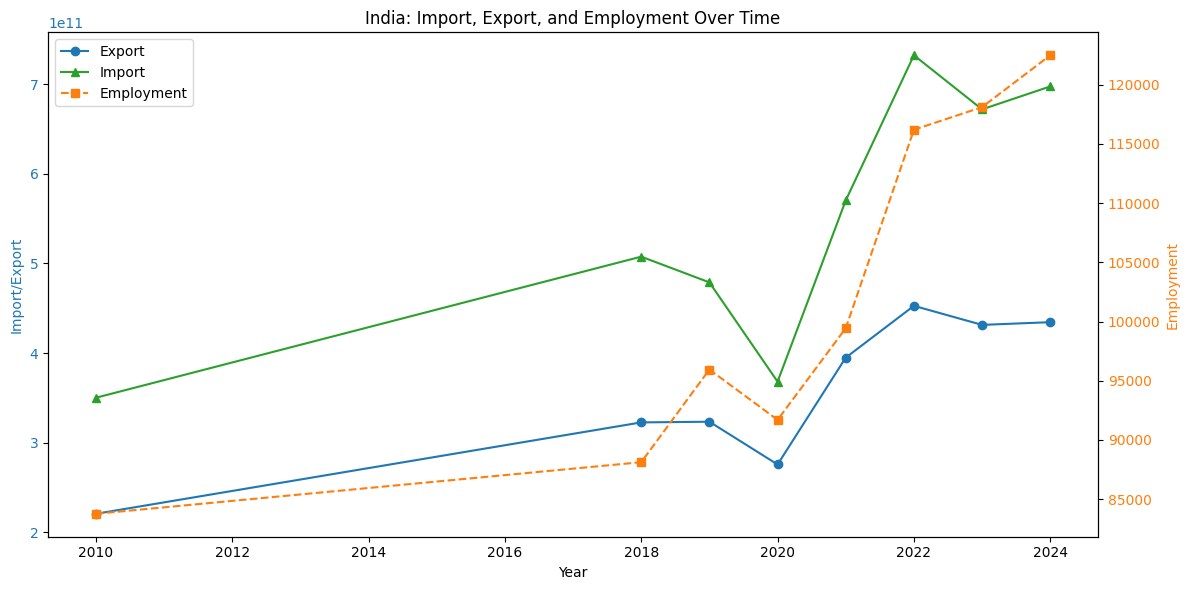

In [18]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(ind_df['year'], ind_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(ind_df['year'], ind_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(ind_df['year'], ind_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('India: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

### 5.5. Vietnam

In [19]:
# Extract data for Vietnam (VNM) 
vnm_df = df.loc['VNM']

# Display the first few rows of the USA data to examine the data 
print(vnm_df.head())
vnm_df = df.loc['VNM']

print(vnm_df.tail())

            Export        Import        ILO
year                                       
2007  4.856134e+10  6.276469e+10   9380.126
2009  5.709627e+10  6.994881e+10  10487.935
2010  7.223666e+10  8.483855e+10  10668.639
2011  9.690567e+10  1.067499e+11  10824.656
2012  1.145292e+11  1.137804e+11  10892.274
            Export        Import        ILO
year                                       
2019  2.646103e+11  2.534420e+11  16148.095
2020  2.814415e+11  2.613095e+11  16568.234
2021  3.357926e+11  3.307523e+11  16243.284
2022  3.709092e+11  3.587883e+11  16880.979
2023  3.530775e+11  3.254437e+11  17140.218


In [20]:
# Create a copy of the JPN data to avoid modifying the original
vnm_df = df.loc['VNM'].copy()

# Reset the index so that 'year' becomes a column (for easier plotting)
vnm_df = vnm_df.reset_index()

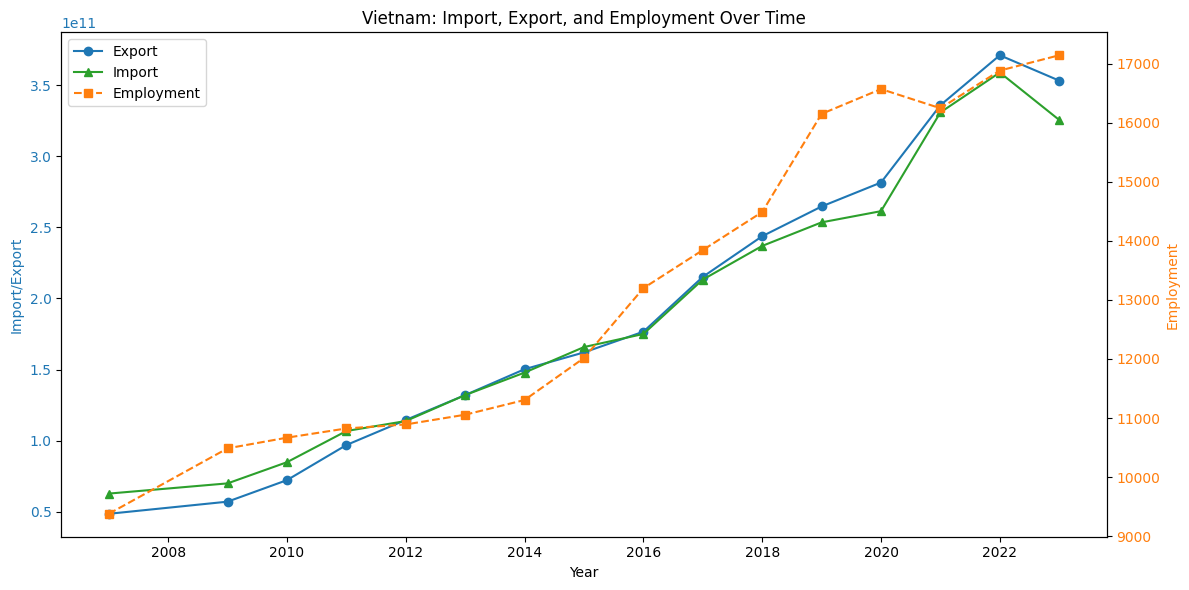

In [21]:
import matplotlib.pyplot as plt

# Create the figure and first axis (for Import & Export)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Export on left Y-axis
ax1.plot(vnm_df['year'], vnm_df['Export'], color='tab:blue', marker='o', label='Export')
# Plot Import on left Y-axis
ax1.plot(vnm_df['year'], vnm_df['Import'], color='tab:green', marker='^', label='Import')
ax1.set_xlabel('Year')
ax1.set_ylabel('Import/Export', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis for Employment
ax2 = ax1.twinx()
ax2.plot(vnm_df['year'], vnm_df['ILO'], 
         color='tab:orange', marker='s', 
         linestyle='--', label='Employment')
ax2.set_ylabel('Employment', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Title and layout
plt.title('Vietnam: Import, Export, and Employment Over Time')
fig.tight_layout()
plt.show()

## 6. Regression Analysis

### 6.1. Level regression analysis

                            OLS Regression Results                            
Dep. Variable:            Q("Export")   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     445.6
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           4.69e-89
Time:                        18:00:27   Log-Likelihood:                -52647.
No. Observations:                1909   AIC:                         1.053e+05
Df Residuals:                    1907   BIC:                         1.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.36e+10   5.67e+09     16.514      0.0

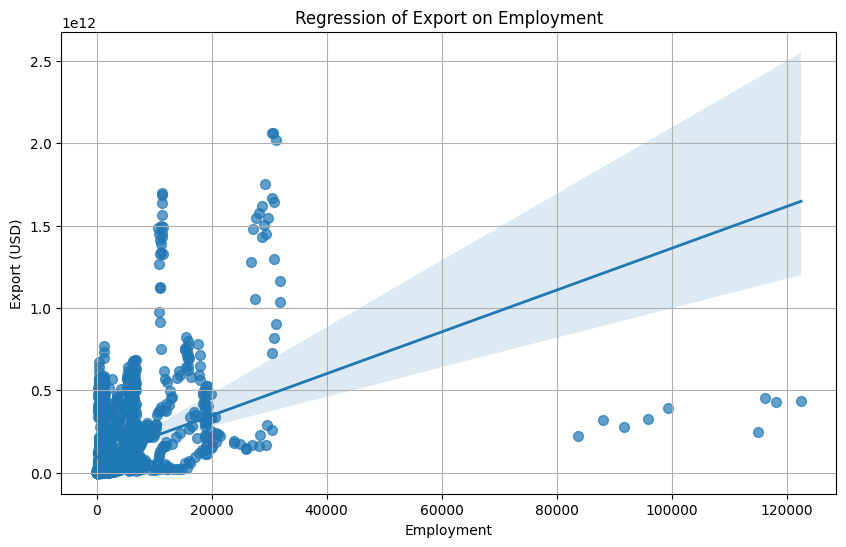

In [23]:
# 2. Prepare the data

# Make sure 'employment' and 'total trade value' exist without NaNs
df_regression = df.dropna(subset=["Export", "ILO"]).reset_index()

# 3. Run the regression using formula
# Note: you need to handle spaces in column names by using `Q("column name")` inside the formula
model = smf.ols(formula='Q("Export") ~ ILO', data=df_regression).fit()

# 4. Print regression summary
print(model.summary())

plt.figure(figsize=(10,6))
sns.regplot(
    data=df_regression,
    x="ILO",
    y="Export",
    scatter_kws={"s":50, "alpha":0.7},
    line_kws={"linewidth":2}
)
plt.title('Regression of Export on Employment')
plt.xlabel('Employment')
plt.ylabel('Export (USD)')
plt.grid(True)
plt.show()


### 6.2. Growth regression analysis 

In [27]:
# It analyzes the relationship between year-to-year changes in employment
# and total trade volume (Export + Import, as Trade_diff), rather than using absolute values.
# Unlike the previous analysis that examined whether high employment correlates with high exports,
# this approach focuses on whether increases in trade are associated with increases in employment over time.
df['Total_Trade'] = df['Export'] + df['Import']
df_merge = df.sort_index()


In [32]:
# Percentage changes
class GenerateFeatures:
    def __init__(self, time_period="Y"):
        self.time_period = time_period

    def transform(self, df):
        # This is just an illustrative transformation
        df_result = df.copy()
        df_result['ILO_chpct1Y'] = df_result['ILO'].pct_change(periods=1)
        df_result['Total_Trade_chpct1Y'] = df_result['Total_Trade'].pct_change(periods=1)
        return df_result

features_generator = GenerateFeatures(time_period="Y")
df_features = features_generator.transform(df_merge)
df_clean = df_features.dropna(subset=['ILO_chpct1Y', 'Total_Trade_chpct1Y'])

correlation = df_clean['ILO_chpct1Y'].corr(df_clean['Total_Trade_chpct1Y'])
print("Correlation between percentage change in employment and trade volume:", correlation)

Correlation between percentage change in employment and trade volume: 0.5544797101532702


/var/folders/r_/0lmfzrrn4s96fk_h10k3hm9m0000gn/T/ipykernel_47678/3068804445.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_result['Total_Trade_chpct1Y'] = df_result['Total_Trade'].pct_change(periods=1)


Text(0.5, 1.0, 'Regression Analysis of Employment and Trade Volume Changes')

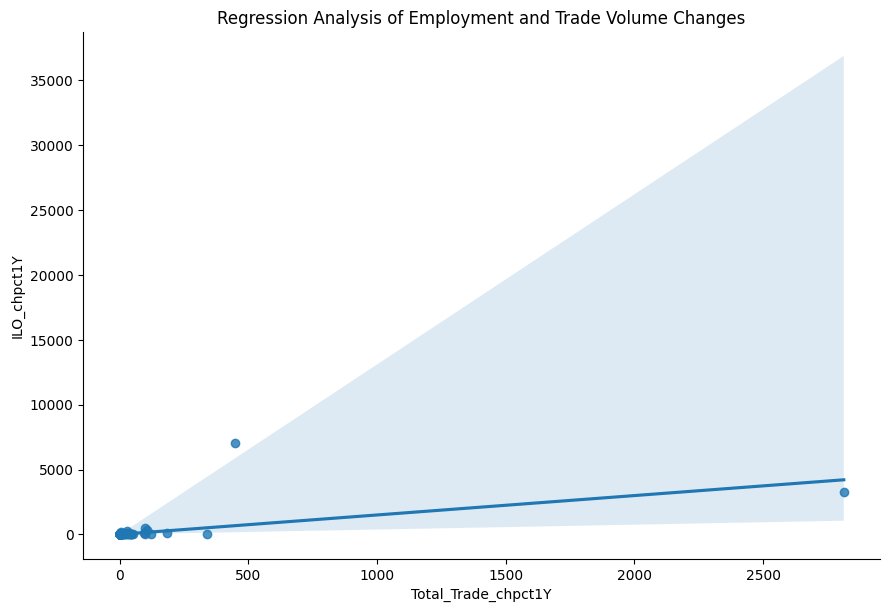

In [33]:
import seaborn as sns
sns.lmplot(x='Total_Trade_chpct1Y', y='ILO_chpct1Y', data=df_clean, height=6, aspect=1.5)
plt.title("Regression Analysis of Employment and Trade Volume Changes")
# Interpretation: When a country's total trade volume increases, its employment tends to increase, on average.

In [35]:
print(df_clean.columns)


Index(['Export', 'Import', 'ILO', 'Total_Trade', 'ILO_chpct1Y',
       'Total_Trade_chpct1Y'],
      dtype='object')


                            OLS Regression Results                            
Dep. Variable:            Q("Export")   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     445.6
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           4.69e-89
Time:                        18:17:48   Log-Likelihood:                -52647.
No. Observations:                1909   AIC:                         1.053e+05
Df Residuals:                    1907   BIC:                         1.053e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.36e+10   5.67e+09     16.514      0.0

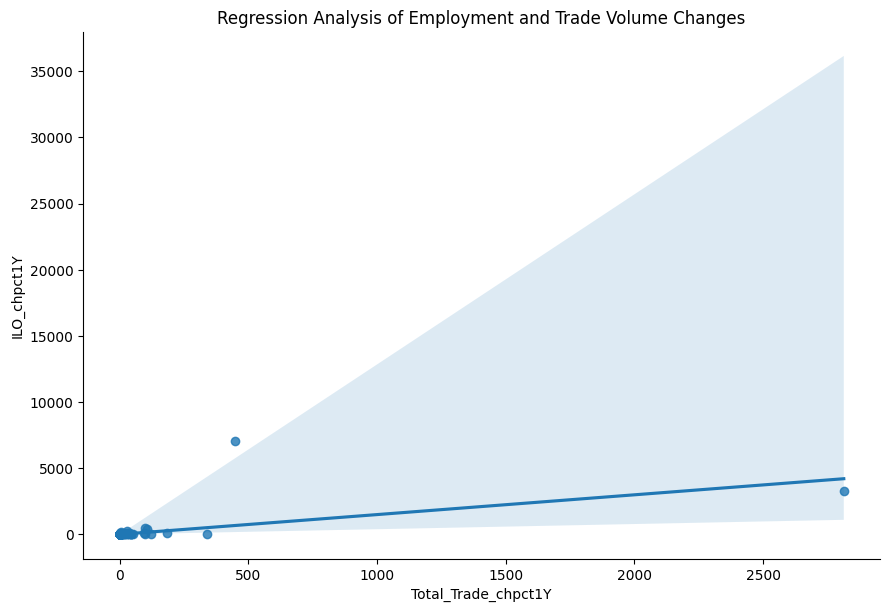

In [36]:
import seaborn as sns
sns.lmplot(x='Total_Trade_chpct1Y', y='ILO_chpct1Y', data=df_clean, height=6, aspect=1.5)
plt.title("Regression Analysis of Employment and Trade Volume Changes")

print(model.summary())
# Interpretation: When a country's total trade volume increases, its employment tends to increase, on average.

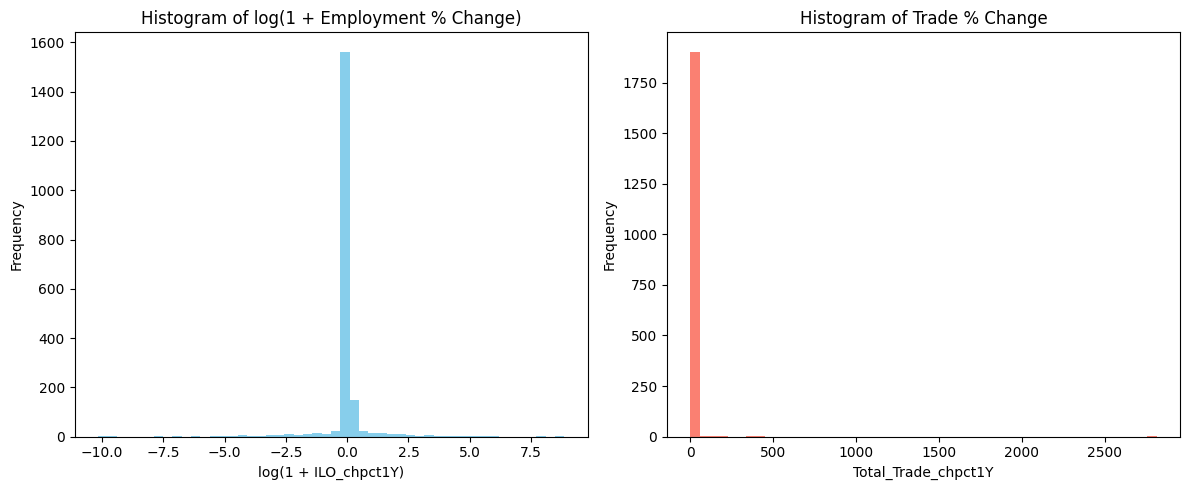

In [ ]:
# Plot histogram for percentage change in employment
# I use log for pct change in employment to reduce the effect of extreme values as the distribution without log was heavily right-skewed

import numpy as np
import matplotlib.pyplot as plt

# Plot histograms of % changes
plt.figure(figsize=(12, 5))

# Subplot 1: Employment % change (log-transformed)
plt.subplot(1, 2, 1)
plt.hist(np.log1p(df_clean['ILO_chpct1Y']), bins=50, color='skyblue')
plt.title("Histogram of log(1 + Employment % Change)")
plt.xlabel("log(1 + ILO_chpct1Y)")
plt.ylabel("Frequency")

# Subplot 2: Trade % change
plt.subplot(1, 2, 2)
plt.hist(df_clean['Total_Trade_chpct1Y'], bins=50, color='salmon')
plt.title("Histogram of Trade % Change")
plt.xlabel("Total_Trade_chpct1Y")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
